In [1]:
import numpy as np 
import pandas as pd 

db = pd.read_csv('C:\\Users\\Ayush\\OneDrive - BBTech\\Desktop\\sem 6\\BI\\datasets\\French_fashion_c2c\\6M-0K-99K.users.dataset.public.csv')

In [2]:
repeat_columns = []
# unused and repeated metadata are dropped
repeat_columns += ['identifierHash', 'type','country','gender']
db1=db.drop(repeat_columns,axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,ct,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,mrs,False,False,False,True,22,2854,95.13,7.93,us


Encode variables

In [3]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

string_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in string_columns:
    var_cat = db[[var]] #use double brakets to make sure i'm taking a dataframe 
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat)
    var_cat_df = pd.DataFrame(var_cat_encoded)
    var_cat_df.columns = [var + '_encoded'] 
    db1 = db1.merge(var_cat_df, how = 'inner', left_index = True, right_index = True)

db2 = db1.drop(string_columns, axis = 1)
db2.head()
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          98913 non-null  int64  
 1   socialNbFollows            98913 non-null  int64  
 2   socialProductsLiked        98913 non-null  int64  
 3   productsListed             98913 non-null  int64  
 4   productsSold               98913 non-null  int64  
 5   productsPassRate           98913 non-null  float64
 6   productsWished             98913 non-null  int64  
 7   productsBought             98913 non-null  int64  
 8   civilityGenderId           98913 non-null  int64  
 9   ct                         98913 non-null  object 
 10  daysSinceLastLogin         98913 non-null  int64  
 11  seniority                  98913 non-null  int64  
 12  seniorityAsMonths          98913 non-null  float64
 13  seniorityAsYears           98913 non-null  flo

In [4]:
#remove variables with no correlations
no_columns=['seniority','seniorityAsMonths','seniorityAsYears']
db3 = db2.drop(no_columns, axis = 1)

In [5]:
def models(X_train,y_train,X_test,y_test):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import r2_score as r2
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingRegressor as gb
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    from sklearn.svm import SVR
    from sklearn.model_selection import cross_val_score
    import warnings
    warnings.simplefilter('ignore')
    from sklearn.metrics import confusion_matrix , classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression 
    from sklearn import svm
    import xgboost as xgb
    print('Select 1 : Naive Bayes, 2: Support Vector Machines, 3: Logistic Regression, 4: Decision Tree, 5: RandomForestClassifier,6:Xtreme gradient boosting')
    mo = int(input())
    list=[1,2,3,4,5,6]

    if mo == 1 :
        model = GaussianNB()
    elif mo == 2 :
        model = svm.SVC()
    elif mo == 3 :
        model = LogisticRegression()
    elif mo == 4 :
        model = DecisionTreeClassifier()
    elif mo == 5 :
        model = RandomForestClassifier(random_state=15325)
    elif mo == 6 :
        model = xgb.XGBClassifier()
    else :
        print('Invalid Entry')
        model.fit(X_train,Y_train)
    predict= model.predict(X_test)
    print("testing set accuracy score: ",accuracy_score(Y_test,predict))
    accuracies = cross_val_score(estimator = model , X= X_train , y=Y_train , cv =10)
    print("testing set accuracy mean: ", accuracies.mean())
    print(classification_report(Y_test,predict))
    print("confusion matrix: ")
    print(confusion_matrix(Y_test,predict))

In [6]:
#define confusion matrix visualization function
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

def plot_multiclass_roc_curve(y_true, y_scores, n_classes, title='ROC Curve'):
    # Binarize the output
    y_true = label_binarize(y_true, classes=[0, 1, 2]) # Assuming 3 classes
    n_classes = y_true.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()




In [8]:
#define accuracy function
def predAcc(x_train,x_test,y_train,y_test,model):
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize

    model.fit(x_train,y_train)
    predictTR = model.predict(x_train)
    predictTT = model.predict(x_test)
    predict_probaTT = model.predict_proba(x_test) # Predicted probabilities for test set

    print('Accuracy on train set: {:.3f}'.format(accuracy_score(y_train,predictTR)))
    print('Accuracy on test set: {:.3f}'.format(accuracy_score(y_test,predictTT)))
    print('Model Evaluation:')
    print("classification report of train set: ")
    print(classification_report(y_train, predictTR))
    print("classification report of test set: ")
    print(classification_report(y_test, predictTT))


    print("Confusion matrix of test set: ")
    cnf_matrix = confusion_matrix(y_test, predictTT)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, 
                          classes=['Inactive sellers', 'Occational sellers', 'Frequent sellers'],  
                          title='Confusion matrix accumulate')

    # Plot ROC curve for the test set
    plt.figure()
    # Assuming y_test is a 1D array of true labels and predict_probaTT is a 2D array of predicted probabilities
    # Binarize the true labels
    y_test_bin = label_binarize(y_test, classes=range(3)) # Assuming 3 classes
    plot_multiclass_roc_curve(y_test_bin, predict_probaTT, n_classes=3, title='ROC Curve for Test Set')
    #     print(f"intercept: {logreg.intercept_} ")


In [9]:
#define feature selection function
def feaSelect(x_train,y_train,func,x):
    import warnings
    warnings.simplefilter('ignore')
    from sklearn.feature_selection import RFE
    predictors=x_train
    selector=RFE(func,n_features_to_select=1)
    selector=selector.fit(predictors,y_train)
    order=selector.ranking_
    order

    feature_ranks=[]
    for i in order:
        feature_ranks.append(f"{i-1}.{x.columns[i-1]}")
    
    print(feature_ranks)

original model


In [10]:
def org(x,y):
    #split the dataset
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33, random_state=42)
    #rebuild model
    model.fit(X_train,Y_train)
    print("Original Model Evaluation: ")
    predAcc(X_train, X_test, Y_train, Y_test, model)
    print("Original Model's features selection: ")
    feaSelect(X_train,Y_train,model,x)

filtered model with filtered feauture

In [11]:
def filt(xf,yf):
    #re-split the filtered dataset
    Xf_train,Xf_test,Yf_train,Yf_test=train_test_split(xf,yf,test_size=0.33, random_state=42)
    #rebuild model
    model.fit(Xf_train,Yf_train)
    print("Filtered Model Evaluation: ")
    predAcc(Xf_train, Xf_test, Yf_train, Yf_test, model)
    print("Filtered Model's Feature Importance Ranking: ")
    feaSelect(Xf_train,Yf_train,model,xf)

balanced model evalution

In [12]:
def balanced(x_ros,y_ros):
    #re-split the balanced dataset
    X_ros_train,X_ros_test,Y_ros_train,Y_ros_test=train_test_split(x_ros,y_ros,test_size=0.33, random_state=42)
    #rebuild model
    model.fit(X_ros_train,Y_ros_train)
    print("Balanced Model Evaluation: ")
    predAcc(X_ros_train, X_ros_test, Y_ros_train, Y_ros_test, model)
    print("Balanced Model's feature Selections: ")
    feaSelect(X_ros_train,Y_ros_train,model,x_ros)
    print('Resample training dataset shape', Y_ros_train.shape[0])
    print('Resample testing dataset shape', Y_ros_test.shape[0])

final


In [13]:
def balancedFilt(xf_ros,yf_ros):
    #re-split the balanced filtered dataset
    Xf_ros_train,Xf_ros_test,Yf_ros_train,Yf_ros_test=train_test_split(xf_ros,yf_ros,test_size=0.33, random_state=42)
    #Rebuild model
    model.fit(Xf_ros_train,Yf_ros_train)
    print("Balanced Filtered Model Evaluation: ")
    predAcc(Xf_ros_train, Xf_ros_test, Yf_ros_train, Yf_ros_test, model)
    print("Balanced Filtered Model's Feature Importance Ranking: ")
    feaSelect(Xf_ros_train,Yf_ros_train,model,xf_ros)

HasBought As Predictor for the evalution and prediction of sales


In [14]:
from sklearn.model_selection import train_test_split
X=db3[['socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsSold','productsPassRate',
          'productsWished','civilityGenderId','daysSinceLastLogin','language_encoded','countryCode_encoded','hasAnyApp_encoded',
          'hasAndroidApp_encoded','hasIosApp_encoded','hasProfilePicture_encoded']]
#Y=db3['HasBought'] = db3['productsBought'].apply(lambda x: '1' if x >0 else '0')
Y=db3['HasBought'] = db3['productsBought'].apply(lambda x: '2' if x >=3 else('1' if x <3 and x>0 else '0'))

Applied two classification models(Naive Bayes, Support Vector Machines), two regression models(Logistic Regression, Decision Tree), and two advanced supervised models(RandomForestClassifier, Xtreme gradient boosting) for model performance.

In [15]:
#define logistic regression function
import numpy as np
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(multi_class='multinomial',solver='newton-cg') #other solvers not converge

Original Model Evaluation: 
Accuracy on train set: 0.947
Accuracy on test set: 0.946
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     62662
           1       0.29      0.01      0.03      2761
           2       0.65      0.20      0.31       848

    accuracy                           0.95     66271
   macro avg       0.63      0.40      0.44     66271
weighted avg       0.92      0.95      0.93     66271

classification report of test set: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30832
           1       0.27      0.01      0.02      1381
           2       0.60      0.20      0.30       429

    accuracy                           0.95     32642
   macro avg       0.61      0.40      0.43     32642
weighted avg       0.92      0.95      0.92     32642

Confusion matrix of test set: 


c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\Ayush\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


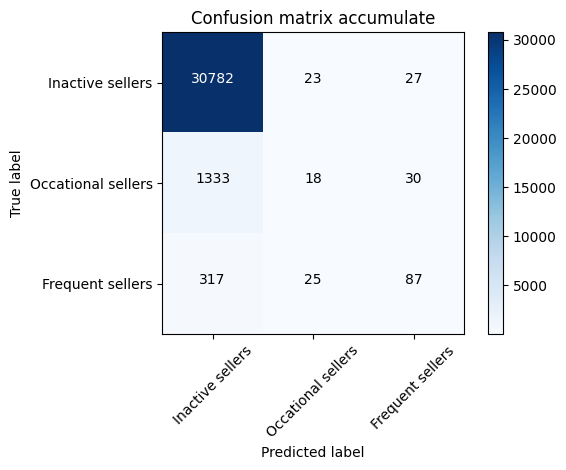

<Figure size 640x480 with 0 Axes>

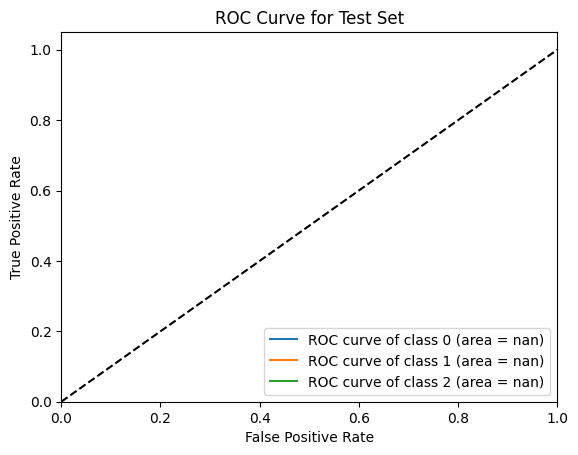

Original Model's features selection: 
['6.productsWished', '10.countryCode_encoded', '13.hasIosApp_encoded', '9.language_encoded', '7.civilityGenderId', '12.hasAndroidApp_encoded', '8.daysSinceLastLogin', '4.productsSold', '11.hasAnyApp_encoded', '5.productsPassRate', '14.hasProfilePicture_encoded', '3.productsListed', '1.socialNbFollows', '2.socialProductsLiked', '0.socialNbFollowers']


In [16]:
org(X,Y)

F1-score of both train and test set is extremely low

In [17]:
#according to the correlation heatmap, pairplot and feature selection, keep top 7
 
d_columns=['productsSold', 'hasAnyApp_encoded', 'productsPassRate', 'hasProfilePicture_encoded', 
           'productsListed', 'socialNbFollows', 'socialProductsLiked', 'socialNbFollowers']

#socialNBFollows & socialProductsLiked has no relationship with a user's willingness to buy a product
Xf = X.drop(d_columns, axis = 1)
Yf = db3['HasBought']
Xy=db3[['productsBought']]
Xf_pp = pd.concat([Xf,Xy], join = 'outer', axis = 1) 

Visualize the relationship between individual variable and dependent variable

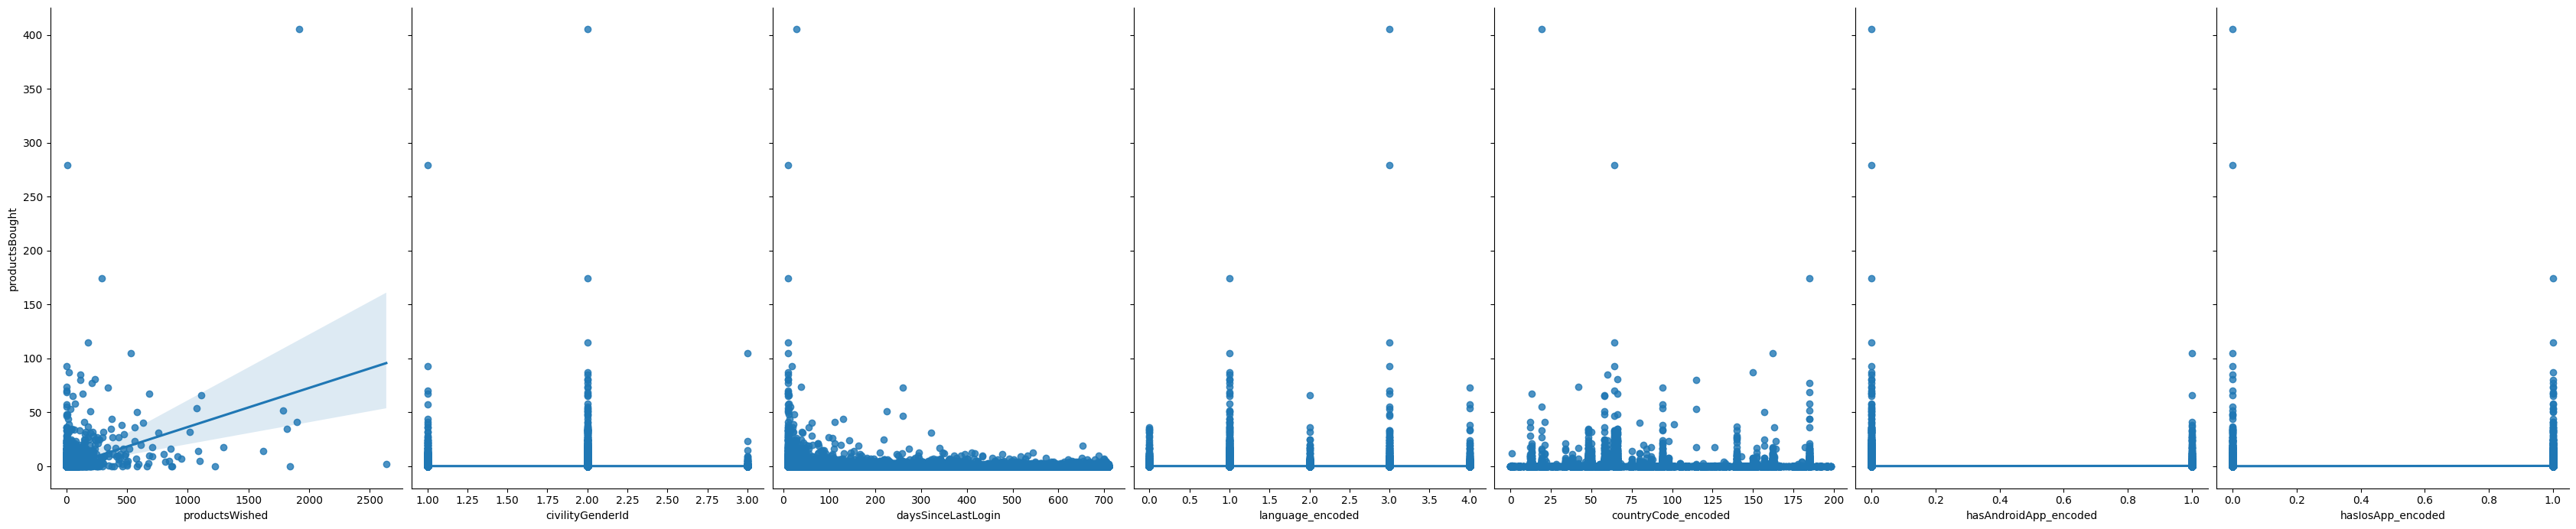

In [18]:
import seaborn as sns
sns.pairplot(Xf_pp, x_vars=Xf.columns, y_vars='productsBought', height=7, aspect=0.7, kind='reg')

No strong linear relationship, only weak linear relationship on productsWished and productsBought

Model Re-evaluation with the Filtered Dataset

Filtered Model Evaluation: 
Accuracy on train set: 0.947
Accuracy on test set: 0.946
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     62662
           1       0.27      0.01      0.01      2761
           2       0.67      0.16      0.26       848

    accuracy                           0.95     66271
   macro avg       0.63      0.39      0.41     66271
weighted avg       0.92      0.95      0.92     66271

classification report of test set: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30832
           1       0.22      0.00      0.01      1381
           2       0.64      0.16      0.26       429

    accuracy                           0.95     32642
   macro avg       0.60      0.39      0.41     32642
weighted avg       0.91      0.95      0.92     32642

Confusion matrix of test set: 


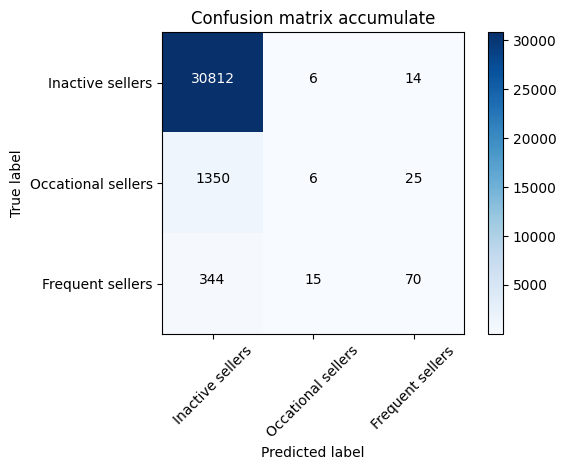

<Figure size 640x480 with 0 Axes>

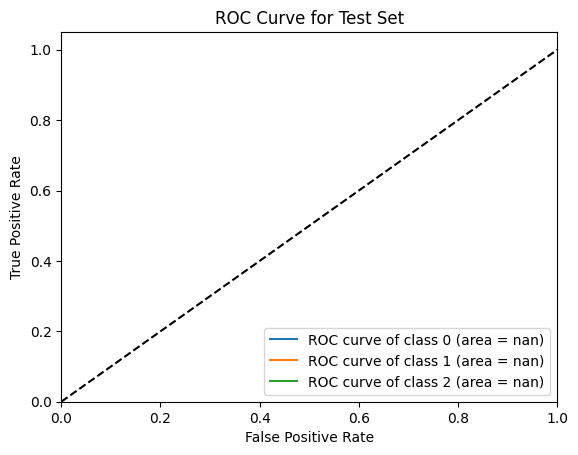

Filtered Model's Feature Importance Ranking: 
['4.countryCode_encoded', '2.daysSinceLastLogin', '5.hasAndroidApp_encoded', '3.language_encoded', '6.hasIosApp_encoded', '0.productsWished', '1.civilityGenderId']


In [19]:
filt(Xf,Yf)

In logistic regression, if the intercept is below 1 implies a reduction in the probability that the event happens. To sum up: b) logit negative value = logistic < 1 = decrease in the probability of the event when you have a positive change in the independent variables

New users' prediction

In [20]:
c=Xf
c.dataframeName = "Formean"
c.describe()

,productsWished,civilityGenderId,daysSinceLastLogin,language_encoded,countryCode_encoded,hasAndroidApp_encoded,hasIosApp_encoded
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,1.562595,1.773993,581.291236,1.757201,93.711635,0.048720,0.217636
std,25.192793,0.428679,208.855888,1.154693,55.173154,0.215282,0.412640
min,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,572.000000,1.000000,64.000000,0.000000,0.000000
50%,0.000000,2.000000,694.000000,1.000000,66.000000,0.000000,0.000000
75%,0.000000,2.000000,702.000000,3.000000,152.000000,0.000000,0.000000
max,2635.000000,3.000000,709.000000,4.000000,198.000000,1.000000,1.000000


In [21]:
#try to predict when a user using mean
newdata=[[2,2,581,2,94,0,0]]
Y_pred1 = model.predict(newdata)
print("prediction with mean features: ",Y_pred1)
#socialNbFollowers affect the prediction the most

#try to predict when a user using max
newdata1=[[2635,3,709,4,198,1,1]]
Y_pred2=model.predict(newdata1)
print("prediction with max features: ", Y_pred2)

prediction with mean features:  ['0']
prediction with max features:  ['2']


In [22]:
print(db3['HasBought'].value_counts())

HasBought
0    93494
1     4142
2     1277
Name: count, dtype: int64


Bootstrap to resample the imbalanced data Re-split the balanced dataset

In [23]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from collections import Counter
ros = RandomOverSampler(random_state=42)

 # fit predictor and target variable
X_ros, Y_ros = ros.fit_resample(X, Y)
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(Y_ros))

X_ros=pd.DataFrame(X_ros,columns=['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'civilityGenderId', 'daysSinceLastLogin', 'language_encoded',
       'countryCode_encoded', 'hasAnyApp_encoded', 'hasAndroidApp_encoded',
       'hasIosApp_encoded', 'hasProfilePicture_encoded'])
Y_ros.to_frame() 


Original dataset shape Counter({'0': 93494, '1': 4142, '2': 1277})
Resample dataset shape Counter({'1': 93494, '0': 93494, '2': 93494})


,productsBought
0,1
1,0
2,2
3,0
4,0
...,...
280477,2
280478,2
280479,2
280480,2


Balanced Model Evaluation

Balanced Model Evaluation: 
Accuracy on train set: 0.646
Accuracy on test set: 0.646
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.69      0.84      0.75     62789
           1       0.52      0.34      0.41     62738
           2       0.68      0.76      0.71     62395

    accuracy                           0.65    187922
   macro avg       0.63      0.65      0.63    187922
weighted avg       0.63      0.65      0.63    187922

classification report of test set: 
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     30705
           1       0.52      0.34      0.41     30756
           2       0.68      0.76      0.72     31099

    accuracy                           0.65     92560
   macro avg       0.63      0.65      0.63     92560
weighted avg       0.63      0.65      0.63     92560

Confusion matrix of test set: 


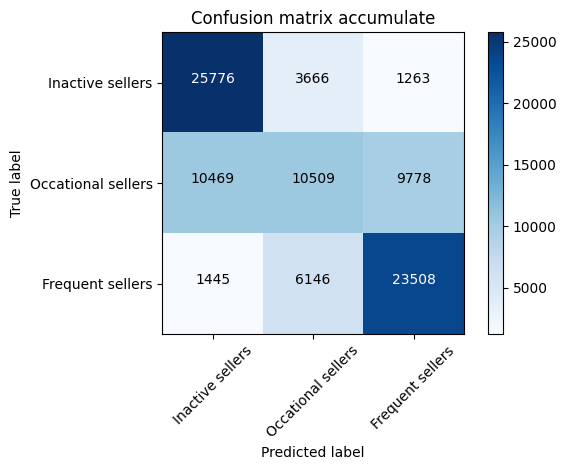

<Figure size 640x480 with 0 Axes>

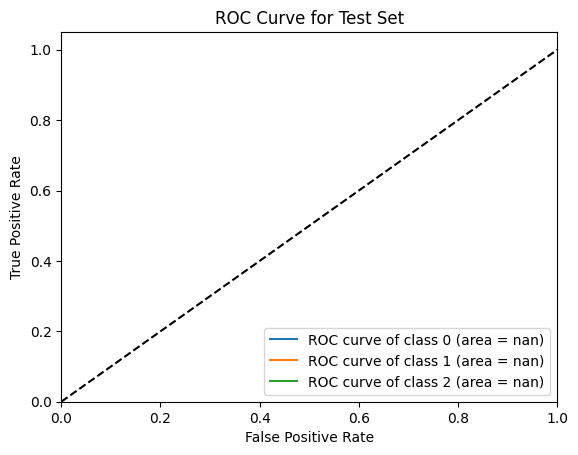

Balanced Model's feature Selections: 
['4.productsSold', '9.language_encoded', '13.hasIosApp_encoded', '10.countryCode_encoded', '6.productsWished', '11.hasAnyApp_encoded', '7.civilityGenderId', '5.productsPassRate', '12.hasAndroidApp_encoded', '8.daysSinceLastLogin', '14.hasProfilePicture_encoded', '3.productsListed', '2.socialProductsLiked', '1.socialNbFollows', '0.socialNbFollowers']
Resample training dataset shape 187922
Resample testing dataset shape 92560


In [24]:
balanced(X_ros,Y_ros)

We could clearly observe more balanced f1-score that the f1-score of case 'HasBought'=1 increased significantly although 0's dropped slightly

In [25]:
#Re-split the filtered dataset

#according to the correlation heatmap, pairplot and feature selection, keep top 7
d_columns=[ 'productsPassRate', 'hasAndroidApp_encoded', 'daysSinceLastLogin', 'hasProfilePicture_encoded', 
           'productsListed', 'socialProductsLiked', 'socialNbFollows', 'socialNbFollowers']
#socialNBFollows & socialProductsLiked has no relationship with a user's willingness to buy a product
Xf_ros = X_ros.drop(d_columns, axis = 1)
Yf_ros = Y_ros

Balanced Model Re-evaluation with Filtered Dataset

Balanced Filtered Model Evaluation: 
Accuracy on train set: 0.541
Accuracy on test set: 0.541
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.52      0.88      0.65     62789
           1       0.43      0.18      0.25     62738
           2       0.64      0.56      0.60     62395

    accuracy                           0.54    187922
   macro avg       0.53      0.54      0.50    187922
weighted avg       0.53      0.54      0.50    187922

classification report of test set: 
              precision    recall  f1-score   support

           0       0.51      0.89      0.65     30705
           1       0.43      0.18      0.25     30756
           2       0.65      0.56      0.60     31099

    accuracy                           0.54     92560
   macro avg       0.53      0.54      0.50     92560
weighted avg       0.53      0.54      0.50     92560

Confusion matrix of test set: 


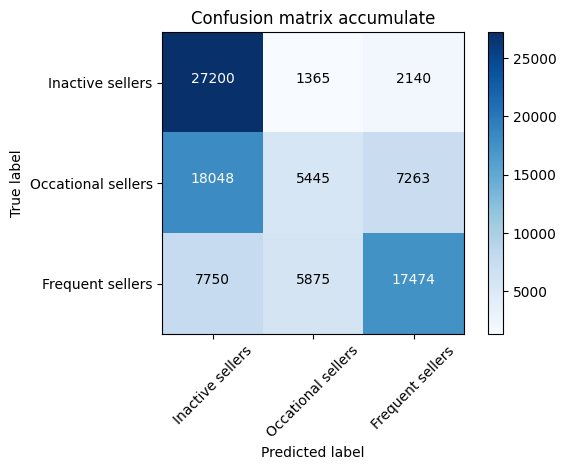

<Figure size 640x480 with 0 Axes>

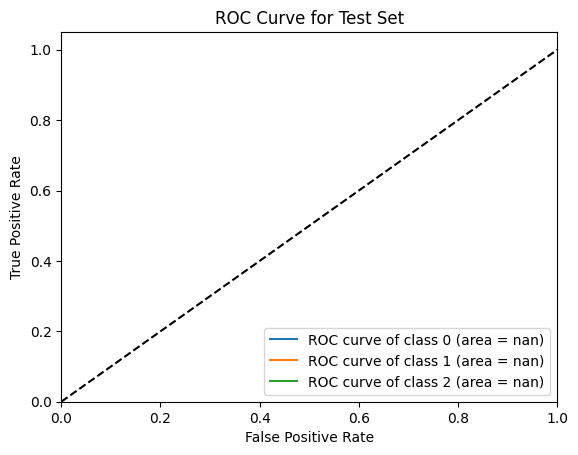

Balanced Filtered Model's Feature Importance Ranking: 
['3.language_encoded', '2.civilityGenderId', '1.productsWished', '4.countryCode_encoded', '6.hasIosApp_encoded', '0.productsSold', '5.hasAnyApp_encoded']


In [26]:
balancedFilt(Xf_ros,Yf_ros)

Updated New users’ prediction for new values

In [27]:
c=Xf_ros
c.dataframeName = "Formean"
c.describe()

,productsSold,productsWished,civilityGenderId,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasIosApp_encoded
count,280482.000000,280482.00000,280482.000000,280482.000000,280482.000000,280482.000000,280482.000000
mean,0.708338,22.38651,1.759157,1.665526,90.097029,0.399605,0.332930
std,5.278167,106.68193,0.448974,1.164228,53.228995,0.489818,0.471263
min,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,1.000000,1.000000,58.000000,0.000000,0.000000
50%,0.000000,0.00000,2.000000,1.000000,64.000000,0.000000,0.000000
75%,0.000000,4.00000,2.000000,3.000000,140.000000,1.000000,1.000000
max,174.000000,2635.00000,3.000000,4.000000,198.000000,1.000000,1.000000


In [28]:
#try to predict when a user using mean
newdata=[[1,22,2,2,90,0,0]]
Y_pred1 = model.predict(newdata)
print("prediction with mean features: ",Y_pred1)
#socialNbFollowers affect the prediction the most

#try to predict when a user using max
newdata1=[[174,2635,3,4,198,1,1]]
Y_pred2=model.predict(newdata1)
print("prediction with max features: ", Y_pred2)

prediction with mean features:  ['1']
prediction with max features:  ['2']


They both used countryCode_encoded, language_encoded, hasIosApp_encoded, productsWished, civilityGenderId Imbalanced used daysSinceLast Login, hasAndroidApp_encoded Balanced used productsSold

Balanced dataset prediction has significantly higher f1socre on HasBought=1

Extreme Gradient Boosting for getting higher accuracy

Model Built


In [29]:
import xgboost as xgb
model= xgb.XGBClassifier()
Y = Y.astype(int)


Original Model Evaluation: 
Accuracy on train set: 0.965
Accuracy on test set: 0.948
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     62662
           1       0.89      0.28      0.43      2761
           2       0.95      0.66      0.78       848

    accuracy                           0.96     66271
   macro avg       0.94      0.65      0.73     66271
weighted avg       0.96      0.96      0.96     66271

classification report of test set: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     30832
           1       0.39      0.10      0.16      1381
           2       0.56      0.36      0.44       429

    accuracy                           0.95     32642
   macro avg       0.64      0.48      0.52     32642
weighted avg       0.93      0.95      0.93     32642

Confusion matrix of test set: 


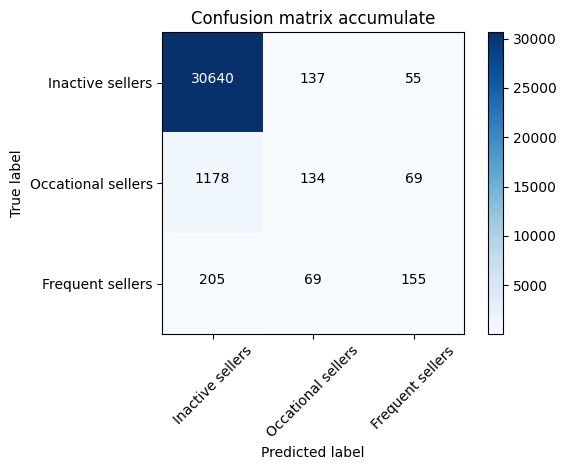

<Figure size 640x480 with 0 Axes>

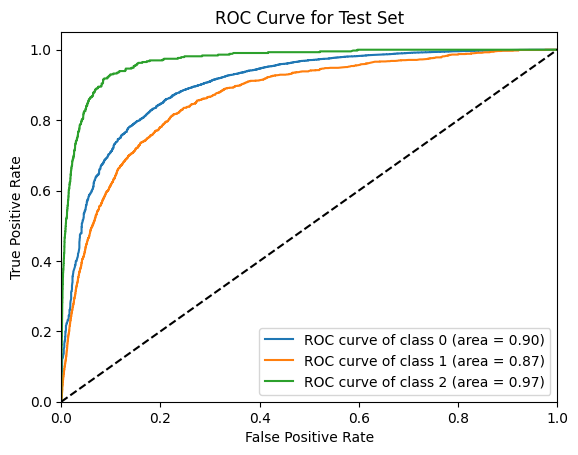

Original Model's features selection: 
['2.socialProductsLiked', '8.daysSinceLastLogin', '5.productsPassRate', '13.hasIosApp_encoded', '9.language_encoded', '12.hasAndroidApp_encoded', '1.socialNbFollows', '4.productsSold', '0.socialNbFollowers', '7.civilityGenderId', '10.countryCode_encoded', '3.productsListed', '11.hasAnyApp_encoded', '6.productsWished', '14.hasProfilePicture_encoded']


In [30]:
org(X,Y)

F1-score of both train and test set increased significantly comparing to LR's in XG boost

In [31]:
#according to the correlation heatmap, pairplot and feature selection, keep top 7
#Re-split the filtered dataset
d_columns=[ 'productsSold', 'socialNbFollowers', 'language_encoded', 'hasAndroidApp_encoded', 'productsListed', 
           'hasAnyApp_encoded', 'daysSinceLastLogin', 'hasProfilePicture_encoded']

#socialNBFollows & socialProductsLiked has no relationship with a user's willingness to buy a product
Xf = X.drop(d_columns, axis = 1)
Yf = db3['HasBought']
Xy=db3[['productsBought']]
Xf_pp = pd.concat([Xf,Xy], join = 'outer', axis = 1) 

Visualize the relationship between individual variable and dependent variable

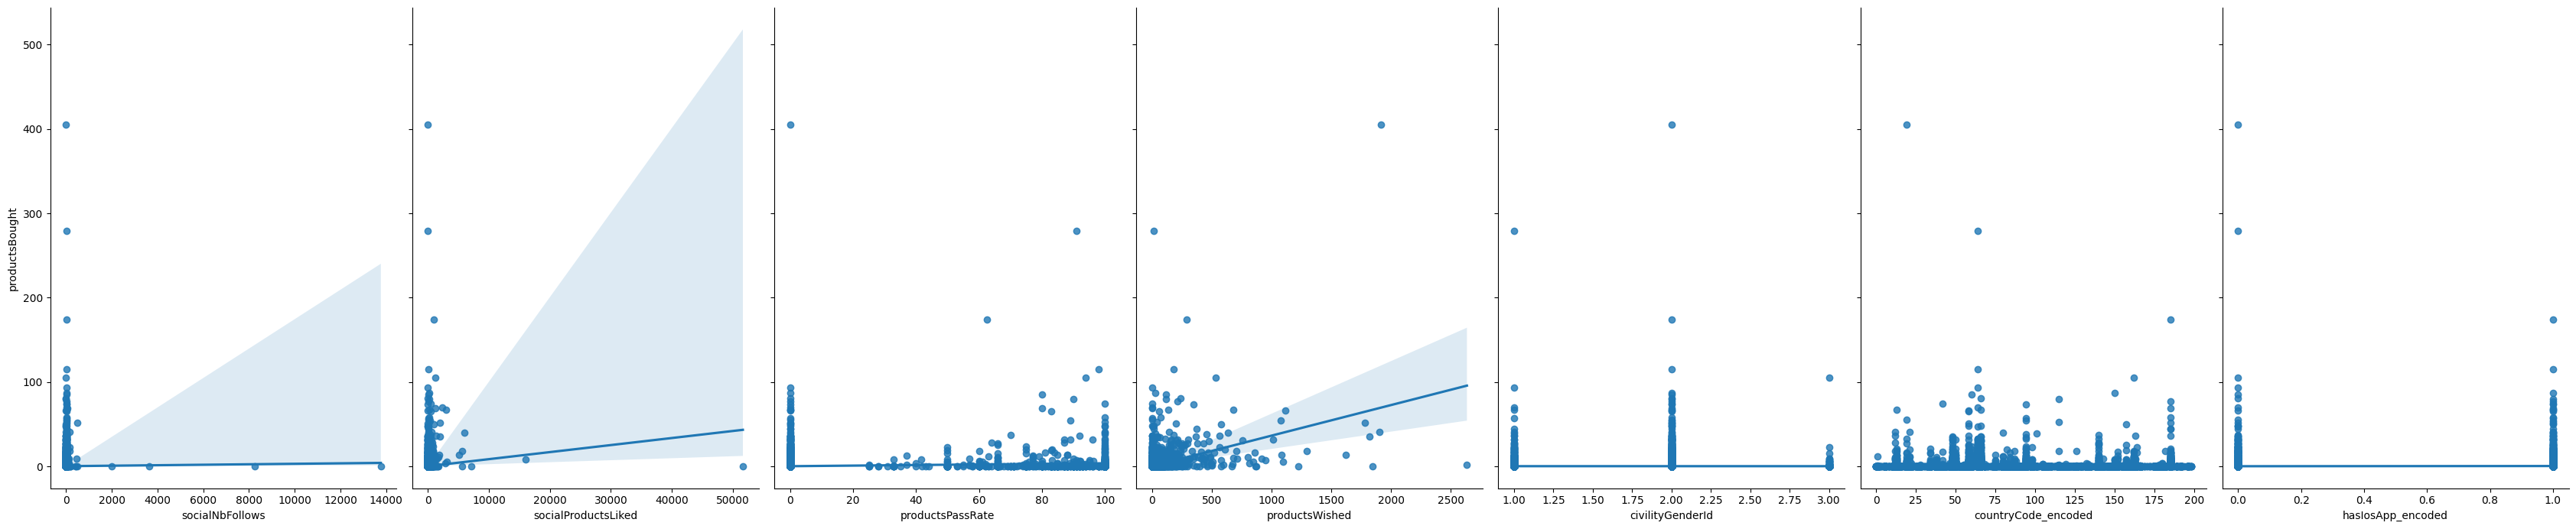

In [32]:
import seaborn as sns
sns.pairplot(Xf_pp, x_vars=Xf.columns, y_vars='productsBought', height=7, aspect=0.7, kind='reg')

Model Re-evaluation with the Filtered Dataset

Filtered Model Evaluation: 
Accuracy on train set: 0.959
Accuracy on test set: 0.945
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     62662
           1       0.94      0.16      0.27      2761
           2       0.97      0.53      0.69       848

    accuracy                           0.96     66271
   macro avg       0.96      0.56      0.65     66271
weighted avg       0.96      0.96      0.95     66271

classification report of test set: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     30832
           1       0.32      0.04      0.07      1381
           2       0.46      0.28      0.35       429

    accuracy                           0.95     32642
   macro avg       0.58      0.44      0.46     32642
weighted avg       0.92      0.95      0.93     32642

Confusion matrix of test set: 


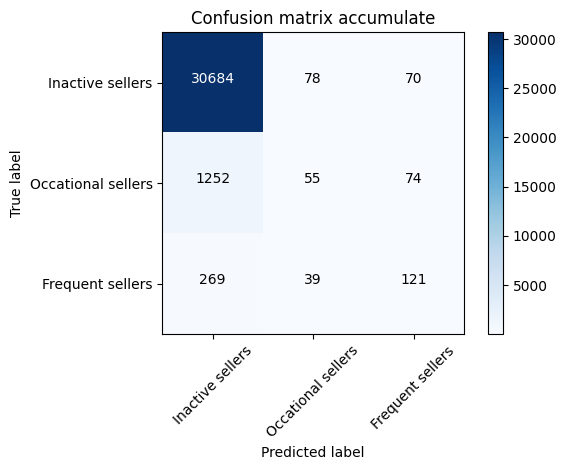

<Figure size 640x480 with 0 Axes>

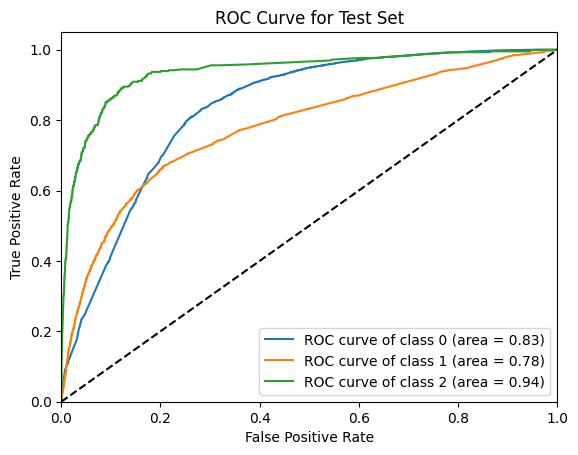

Filtered Model's Feature Importance Ranking: 
['3.productsWished', '1.socialProductsLiked', '4.civilityGenderId', '0.socialNbFollows', '2.productsPassRate', '5.countryCode_encoded', '6.hasIosApp_encoded']


In [33]:
Yf = Yf.astype(int)
filt(Xf,Yf)

New users' prediction

In [34]:
c=Xf
c.dataframeName = "Formean"
c.describe()

,socialNbFollows,socialProductsLiked,productsPassRate,productsWished,civilityGenderId,countryCode_encoded,hasIosApp_encoded
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,8.425677,4.420743,0.812303,1.562595,1.773993,93.711635,0.217636
std,52.839572,181.030569,8.500205,25.192793,0.428679,55.173154,0.412640
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,2.000000,64.000000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,2.000000,66.000000,0.000000
75%,8.000000,0.000000,0.000000,0.000000,2.000000,152.000000,0.000000
max,13764.000000,51671.000000,100.000000,2635.000000,3.000000,198.000000,1.000000


In [35]:
#try to predict when a user using mean and max
nUser = {'socialNbFollows': [8,13764],
        'socialProductsLiked': [4,51671],
        'productsPassRate':[1,100],
        'productsWished':[2,2635],
        'civilityGenderId':[2,3],
        'countryCode_encoded':[94,198],
        'hasIosApp_encoded' :[0,1]  
        }

df2 = pd.DataFrame(nUser, columns = ['socialNbFollows','socialProductsLiked','productsPassRate','productsWished','civilityGenderId',
                'countryCode_encoded','hasIosApp_encoded'])

Y_pred2 = model.predict(df2)
Y_pred2

array([0, 2], dtype=int64)

showing the imbalance of data for testing

In [36]:
print(db3['HasBought'].value_counts())
#very imbalanced sample

HasBought
0    93494
1     4142
2     1277
Name: count, dtype: int64


Bootstrap to resample the imbalanced data to a balanced data

In [37]:
#Balanced Model Evaluation


Balanced Model Evaluation: 
Accuracy on train set: 0.861
Accuracy on test set: 0.856
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     62789
           1       0.80      0.81      0.80     62738
           2       0.96      0.93      0.94     62395

    accuracy                           0.86    187922
   macro avg       0.86      0.86      0.86    187922
weighted avg       0.86      0.86      0.86    187922

classification report of test set: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     30705
           1       0.79      0.80      0.80     30756
           2       0.96      0.92      0.94     31099

    accuracy                           0.86     92560
   macro avg       0.86      0.86      0.86     92560
weighted avg       0.86      0.86      0.86     92560

Confusion matrix of test set: 


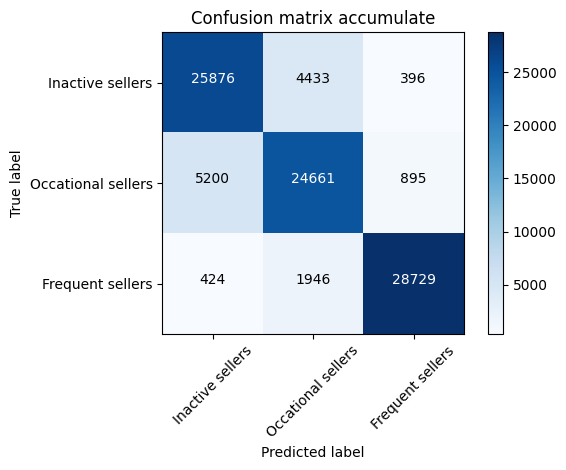

<Figure size 640x480 with 0 Axes>

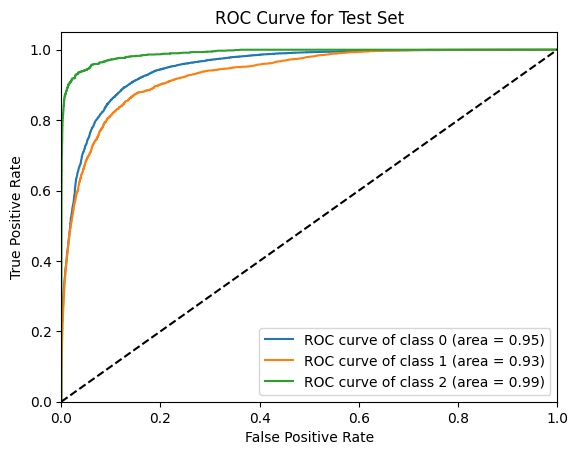

Balanced Model's feature Selections: 
['1.socialNbFollows', '9.language_encoded', '4.productsSold', '13.hasIosApp_encoded', '11.hasAnyApp_encoded', '14.hasProfilePicture_encoded', '2.socialProductsLiked', '6.productsWished', '0.socialNbFollowers', '7.civilityGenderId', '8.daysSinceLastLogin', '3.productsListed', '12.hasAndroidApp_encoded', '5.productsPassRate', '10.countryCode_encoded']
Resample training dataset shape 187922
Resample testing dataset shape 92560


In [38]:
Y_ros = Y_ros.astype(int)
balanced(X_ros,Y_ros)

evalaution for particular features 

In [39]:
#according to the correlation heatmap, pairplot and feature selection, keep top 7
d_columns=[ 'productsPassRate', 'socialNbFollowers', 'countryCode_encoded', 'daysSinceLastLogin', 
           'productsListed', 'hasAnyApp_encoded', 'productsWished', 'language_encoded']
Xf_ros = X_ros.drop(d_columns, axis = 1)
Yf_ros = Y_ros

Balanced Filtered Model Evaluation: 
Accuracy on train set: 0.675
Accuracy on test set: 0.673
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.62      0.85      0.72     62789
           1       0.61      0.46      0.52     62738
           2       0.82      0.71      0.76     62395

    accuracy                           0.67    187922
   macro avg       0.68      0.67      0.67    187922
weighted avg       0.68      0.67      0.67    187922

classification report of test set: 
              precision    recall  f1-score   support

           0       0.62      0.85      0.72     30705
           1       0.60      0.46      0.52     30756
           2       0.82      0.71      0.76     31099

    accuracy                           0.67     92560
   macro avg       0.68      0.67      0.67     92560
weighted avg       0.68      0.67      0.67     92560

Confusion matrix of test set: 


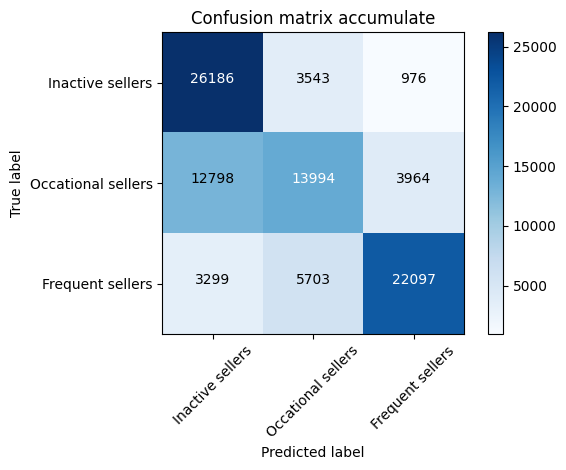

<Figure size 640x480 with 0 Axes>

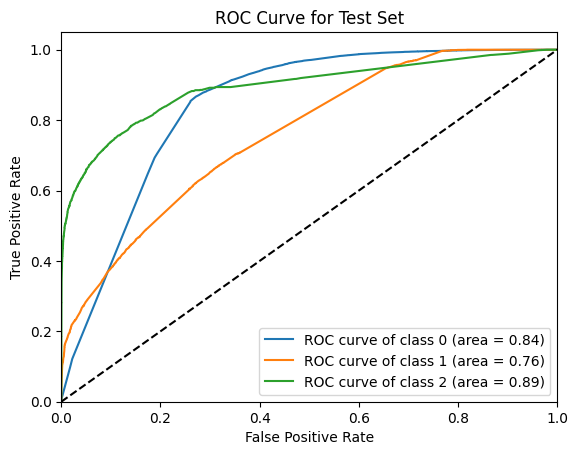

Balanced Filtered Model's Feature Importance Ranking: 
['1.socialProductsLiked', '0.socialNbFollows', '5.hasIosApp_encoded', '2.productsSold', '6.hasProfilePicture_encoded', '4.hasAndroidApp_encoded', '3.civilityGenderId']


In [40]:
balancedFilt(Xf_ros,Yf_ros)

New User's Prediction

In [41]:
c=Xf_ros
c.dataframeName = "Formean"
c.describe()

,socialNbFollows,socialProductsLiked,productsSold,civilityGenderId,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
count,280482.000000,280482.000000,280482.000000,280482.000000,280482.000000,280482.000000,280482.000000
mean,9.542873,46.510329,0.708338,1.759157,0.076436,0.332930,0.902764
std,33.772958,356.068257,5.278167,0.448974,0.265695,0.471263,0.296280
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,8.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000
75%,8.000000,12.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,13764.000000,51671.000000,174.000000,3.000000,1.000000,1.000000,1.000000


In [42]:
#try to predict when a user using mean and max
nUser = {'socialNbFollows': [10,13764],
        'socialProductsLiked': [47,51671],
        'productsSold':[1,174],
        'civilityGenderId':[2,3],
        'hasAndroidApp_encoded':[0,1],
        'hasIosApp_encoded':[0,1],
        'hasProfilePicture_encoded' :[1,1]  
        }

df2 = pd.DataFrame(nUser, columns = ['socialNbFollows','socialProductsLiked','productsSold','civilityGenderId',
                                     'hasAndroidApp_encoded','hasIosApp_encoded', 'hasProfilePicture_encoded'])

Y_pred2 = model.predict(df2)
Y_pred2

array([2, 0], dtype=int64)

For filtered dataset(both imbalanced and balanced): The both used productsWished, civilityGenderId, countryCode_encoded, hasIosApp_encoded Imbalanced used socialProductsLiked, socialNbFollows, productsPassRate Balanced used productsSold, language_encoded, hasAnyApp_encoded

Balanced dataset prediction has significantly higher f1socre on HasBought=1

HasSold As Predictor

Define X and Y

In [43]:
from sklearn.model_selection import train_test_split
X=db3[['socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsBought','productsPassRate',
          'productsWished','civilityGenderId','daysSinceLastLogin','language_encoded','countryCode_encoded','hasAnyApp_encoded',
          'hasAndroidApp_encoded','hasIosApp_encoded','hasProfilePicture_encoded']]
Y=db3['HasSold'] = db3['productsSold'].apply(lambda x: '2' if x >=6 else('1' if x <6 and x>0 else '0'))

Improve XG BOOSTING model with the best performance

In [44]:
import xgboost as xgb
model= xgb.XGBClassifier()
Y = Y.astype(int)

Model Evaluation

Original Model Evaluation: 
Accuracy on train set: 0.994
Accuracy on test set: 0.987
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     64909
           1       0.98      0.66      0.79      1053
           2       1.00      1.00      1.00       309

    accuracy                           0.99     66271
   macro avg       0.99      0.89      0.93     66271
weighted avg       0.99      0.99      0.99     66271

classification report of test set: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31968
           1       0.65      0.36      0.46       525
           2       0.75      0.78      0.76       149

    accuracy                           0.99     32642
   macro avg       0.80      0.71      0.74     32642
weighted avg       0.98      0.99      0.98     32642

Confusion matrix of test set: 


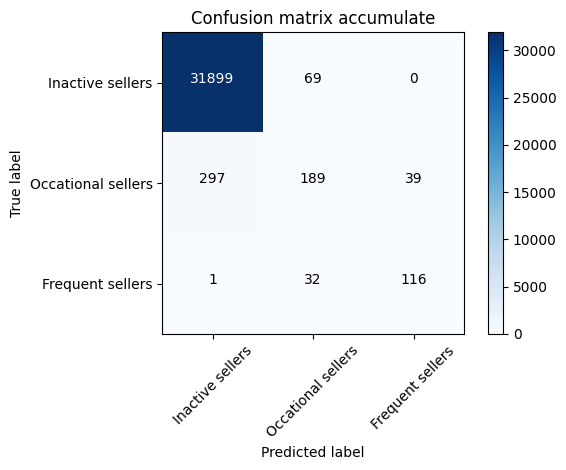

<Figure size 640x480 with 0 Axes>

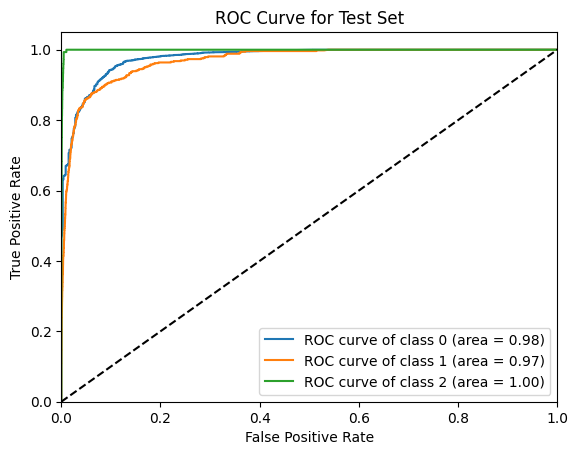

Original Model's features selection: 
['1.socialNbFollows', '12.hasAndroidApp_encoded', '9.language_encoded', '2.socialProductsLiked', '8.daysSinceLastLogin', '0.socialNbFollowers', '11.hasAnyApp_encoded', '4.productsBought', '3.productsListed', '6.productsWished', '10.countryCode_encoded', '13.hasIosApp_encoded', '7.civilityGenderId', '14.hasProfilePicture_encoded', '5.productsPassRate']


In [45]:
org(X,Y)

Re-split the filtered dataset

In [46]:
#according to the correlation heatmap, pairplot and feature selection, keep top 7
d_columns=[ 'productsBought', 'productsListed', 'productsPassRate', 'civilityGenderId', 'language_encoded',
           'hasAndroidApp_encoded', 'hasProfilePicture_encoded', 'productsWished']

#socialNBFollows & socialProductsLiked has no relationship with a user's willingness to buy a product
Xf = X.drop(d_columns, axis = 1)
Yf = db3['HasSold']
Xy=db3[['productsSold']]
Xf_pp = pd.concat([Xf,Xy], join = 'outer', axis = 1)

Visualize the relationship between individual variable and dependent variable

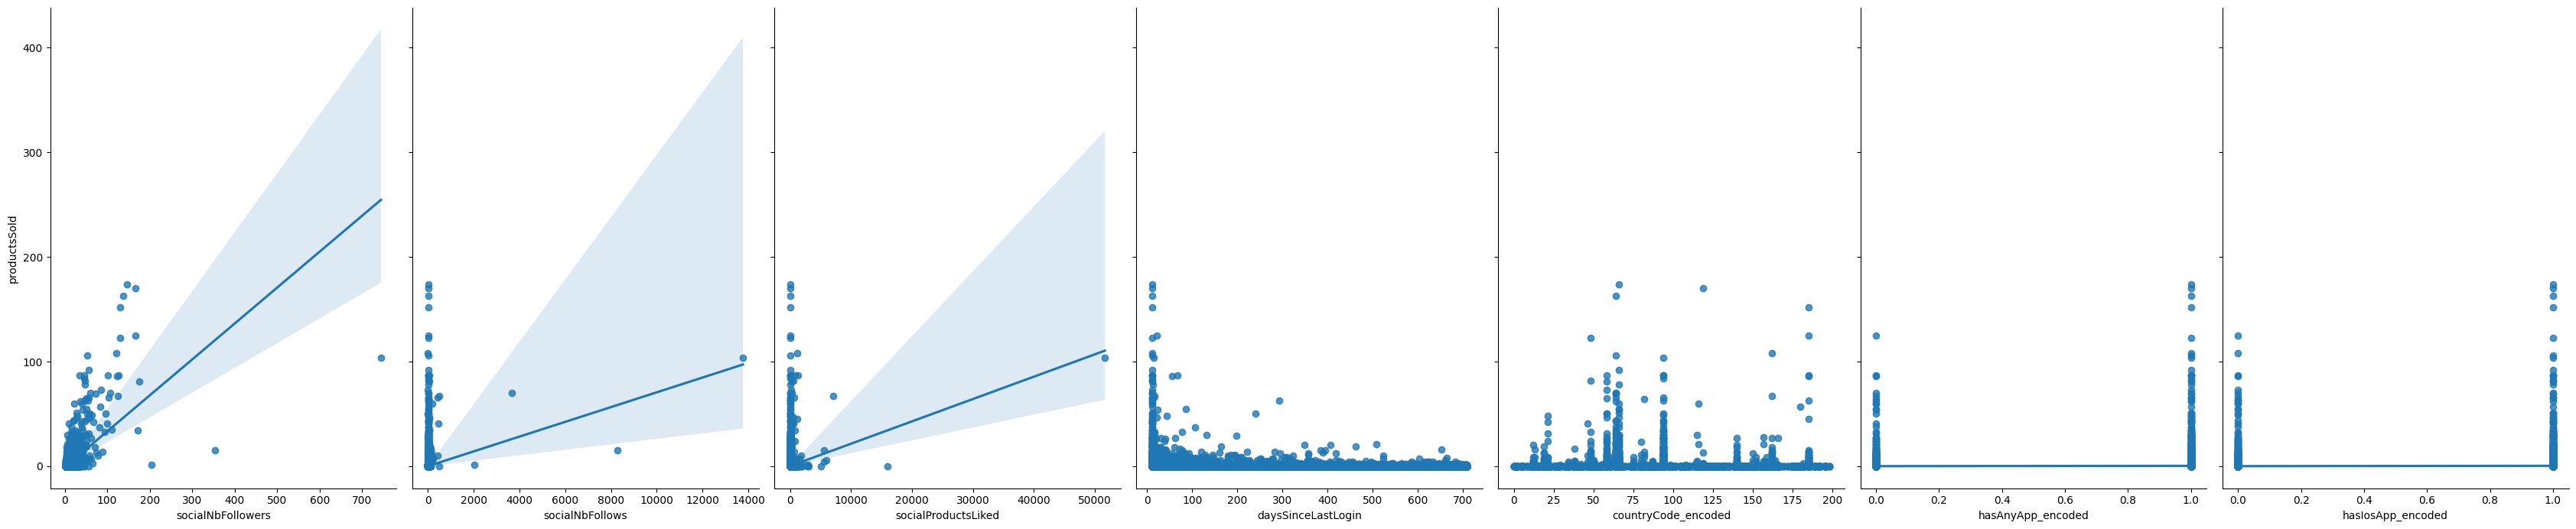

In [47]:
import seaborn as sns
sns.pairplot(Xf_pp, x_vars=Xf.columns, y_vars='productsSold', height=7, aspect=0.7, kind='reg')

Model Re-evaluation with the Filtered Dataset

Filtered Model Evaluation: 
Accuracy on train set: 0.990
Accuracy on test set: 0.981
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     64909
           1       0.91      0.43      0.59      1053
           2       0.95      0.93      0.94       309

    accuracy                           0.99     66271
   macro avg       0.95      0.79      0.84     66271
weighted avg       0.99      0.99      0.99     66271

classification report of test set: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31968
           1       0.42      0.15      0.23       525
           2       0.55      0.52      0.54       149

    accuracy                           0.98     32642
   macro avg       0.65      0.56      0.58     32642
weighted avg       0.98      0.98      0.98     32642

Confusion matrix of test set: 


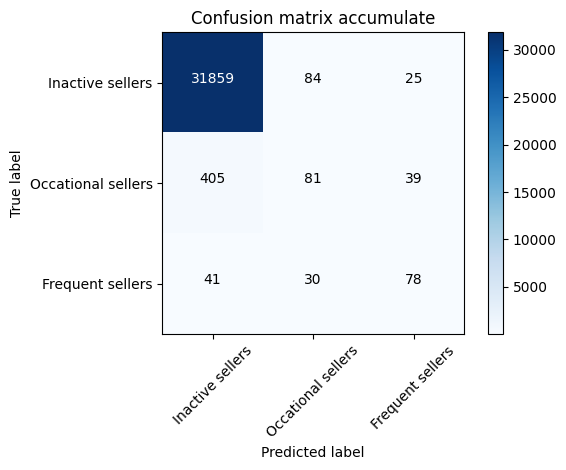

<Figure size 640x480 with 0 Axes>

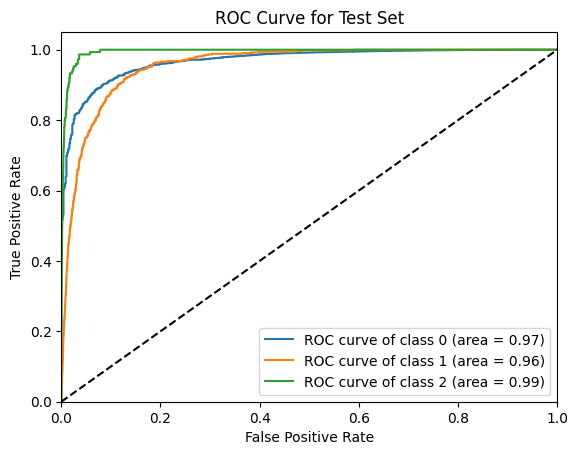

Filtered Model's Feature Importance Ranking: 
['0.socialNbFollowers', '4.countryCode_encoded', '3.daysSinceLastLogin', '1.socialNbFollows', '2.socialProductsLiked', '5.hasAnyApp_encoded', '6.hasIosApp_encoded']


In [48]:
Yf=Yf.astype(int)
filt(Xf,Yf)

insights - f1-score on HasSold=1 dropped significantly on filtered dataset

New users' prediction

In [49]:
c=Xf
c.dataframeName = "Formean"
c.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,daysSinceLastLogin,countryCode_encoded,hasAnyApp_encoded,hasIosApp_encoded
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,3.432269,8.425677,4.420743,581.291236,93.711635,0.264616,0.217636
std,3.882383,52.839572,181.030569,208.855888,55.173154,0.441131,0.412640
min,3.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,0.000000,572.000000,64.000000,0.000000,0.000000
50%,3.000000,8.000000,0.000000,694.000000,66.000000,0.000000,0.000000
75%,3.000000,8.000000,0.000000,702.000000,152.000000,1.000000,0.000000
max,744.000000,13764.000000,51671.000000,709.000000,198.000000,1.000000,1.000000


In [50]:
#try to predict when a user using mean and max
nUser = {'socialNbFollowers': [3,744],
        'socialNbFollows': [8,13764],
        'socialProductsLiked':[4,51671],
        'daysSinceLastLogin':[581,709],
        'countryCode_encoded':[94,198],
        'hasAnyApp_encoded':[0,1],
        'hasIosApp_encoded' :[0,1]  
        }

df2 = pd.DataFrame(nUser, columns = ['socialNbFollowers','socialNbFollows','socialProductsLiked','daysSinceLastLogin',
                                     'countryCode_encoded','hasAnyApp_encoded','hasIosApp_encoded'])

Y_pred2 = model.predict(df2)
Y_pred2

array([0, 0], dtype=int64)

In [51]:
print(db3['HasSold'].value_counts())

HasSold
0    96877
1     1578
2      458
Name: count, dtype: int64


Bootstrap to resample the imbalanced data

In [52]:
from collections import Counter
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

 # fit predictor and target variable
X_ros, Y_ros = ros.fit_resample(X, Y)
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(Y_ros))

X_ros=pd.DataFrame(X_ros,columns=['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsBought', 'productsPassRate', 'productsWished',
       'civilityGenderId', 'daysSinceLastLogin', 'language_encoded',
       'countryCode_encoded', 'hasAnyApp_encoded', 'hasAndroidApp_encoded',
       'hasIosApp_encoded', 'hasProfilePicture_encoded'])
Y_ros.to_frame()
#Y_ros=pd.DataFrame(Y_ros,columns=['HasSold'])

Original dataset shape Counter({0: 96877, 1: 1578, 2: 458})
Resample dataset shape Counter({2: 96877, 1: 96877, 0: 96877})


,productsSold
0,2
1,2
2,2
3,2
4,2
...,...
290626,2
290627,2
290628,2
290629,2


Balanced Model Evaluation

Balanced Model Evaluation: 
Accuracy on train set: 0.976
Accuracy on test set: 0.973
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     65065
           1       0.96      0.96      0.96     64833
           2       1.00      1.00      1.00     64824

    accuracy                           0.98    194722
   macro avg       0.98      0.98      0.98    194722
weighted avg       0.98      0.98      0.98    194722

classification report of test set: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     31812
           1       0.96      0.96      0.96     32044
           2       1.00      1.00      1.00     32053

    accuracy                           0.97     95909
   macro avg       0.97      0.97      0.97     95909
weighted avg       0.97      0.97      0.97     95909

Confusion matrix of test set: 


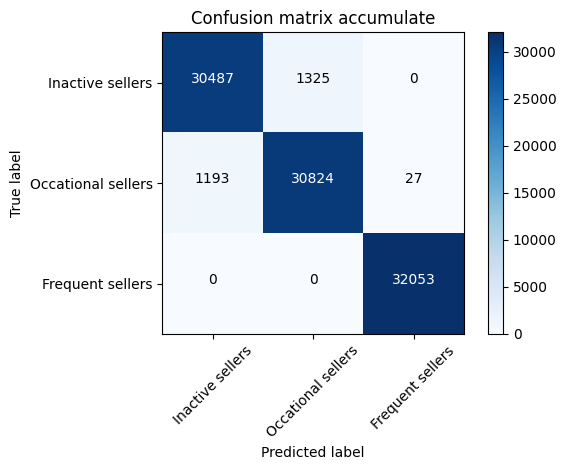

<Figure size 640x480 with 0 Axes>

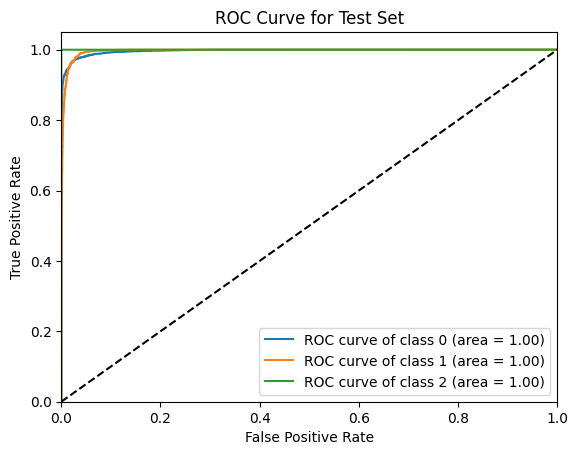

Balanced Model's feature Selections: 
['1.socialNbFollows', '10.countryCode_encoded', '7.civilityGenderId', '2.socialProductsLiked', '9.language_encoded', '0.socialNbFollowers', '13.hasIosApp_encoded', '5.productsPassRate', '3.productsListed', '6.productsWished', '8.daysSinceLastLogin', '12.hasAndroidApp_encoded', '14.hasProfilePicture_encoded', '11.hasAnyApp_encoded', '4.productsBought']
Resample training dataset shape 194722
Resample testing dataset shape 95909


In [53]:
Y_ros=Y_ros.astype(int)
balanced(X_ros,Y_ros)


refiltred data for balanced model evaluation

In [54]:
#according to the correlation heatmap, pairplot and feature selection, keep top 7

d_columns=[ 'productsWished', 'productsListed', 'productsPassRate', 'daysSinceLastLogin',
           'hasIosApp_encoded', 'hasProfilePicture_encoded', 'hasAndroidApp_encoded', 'productsBought']

Xf_ros = X_ros.drop(d_columns, axis = 1)
Yf_ros = Y_ros

Balanced Model Re-evaluation with the Filtered Dataset

Balanced Filtered Model Evaluation: 
Accuracy on train set: 0.908
Accuracy on test set: 0.905
Model Evaluation:
classification report of train set: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     65065
           1       0.88      0.85      0.86     64833
           2       0.96      0.96      0.96     64824

    accuracy                           0.91    194722
   macro avg       0.91      0.91      0.91    194722
weighted avg       0.91      0.91      0.91    194722

classification report of test set: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     31812
           1       0.87      0.85      0.86     32044
           2       0.96      0.96      0.96     32053

    accuracy                           0.91     95909
   macro avg       0.90      0.91      0.90     95909
weighted avg       0.90      0.91      0.90     95909

Confusion matrix of test set: 


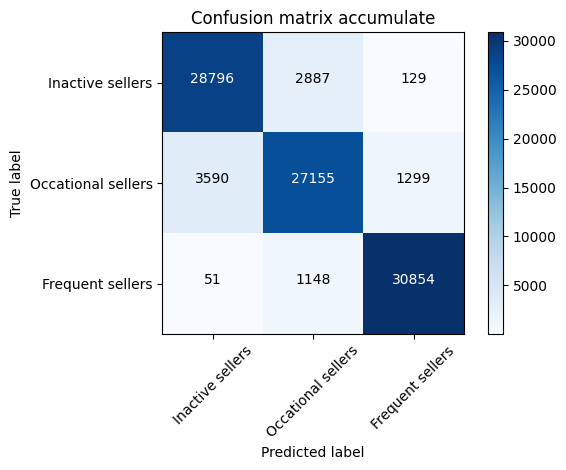

<Figure size 640x480 with 0 Axes>

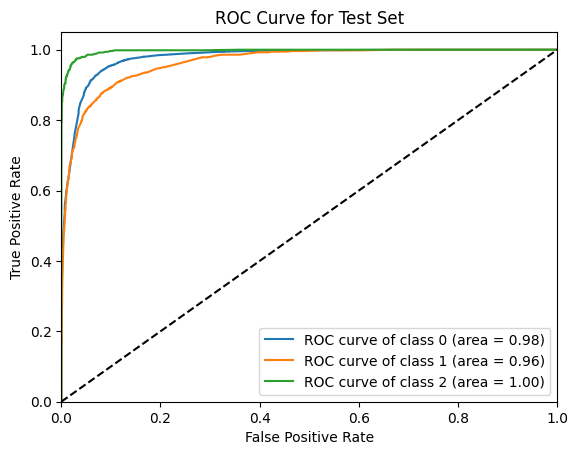

Balanced Filtered Model's Feature Importance Ranking: 
['0.socialNbFollowers', '6.hasAnyApp_encoded', '3.civilityGenderId', '1.socialNbFollows', '2.socialProductsLiked', '4.language_encoded', '5.countryCode_encoded']


In [55]:
Yf_ros=Yf_ros.astype(int)
balancedFilt(Xf_ros,Yf_ros)

insiights - overall accuracy and f1-score on HasSold=1 decreased on filtered dataset for both balanced and imbalanced cases. Especially the f1-score on HasSold=1 decreased significantly on imbalanced cases

New User's Prediction

In [56]:
c=Xf_ros
c.dataframeName = "Formean"
c.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,civilityGenderId,language_encoded,countryCode_encoded,hasAnyApp_encoded
count,290631.000000,290631.000000,290631.000000,290631.000000,290631.000000,290631.000000,290631.000000
mean,12.488214,30.596760,78.117678,1.806855,2.078729,86.008478,0.533825
std,28.441590,441.426421,1391.428898,0.480905,1.252615,45.288331,0.498855
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,0.000000,2.000000,1.000000,64.000000,0.000000
50%,5.000000,8.000000,0.000000,2.000000,2.000000,66.000000,1.000000
75%,12.000000,8.000000,7.000000,2.000000,3.000000,94.000000,1.000000
max,744.000000,13764.000000,51671.000000,3.000000,4.000000,198.000000,1.000000


In [57]:
#try to predict when a user using mean and max
nUser = {'socialNbFollowers': [13,744],
        'socialNbFollows': [31,13764],
        'socialProductsLiked':[78,51671],
        'civilityGenderId':[2,3],
        'language_encoded':[2,4],
        'countryCode_encoded':[86,198],
        'hasAnyApp_encoded' :[1,1]  
        }

df2 = pd.DataFrame(nUser, columns = ['socialNbFollowers','socialNbFollows','socialProductsLiked','civilityGenderId',
                                     'language_encoded','countryCode_encoded','hasAnyApp_encoded'])

Y_pred2 = model.predict(df2)
Y_pred2

array([2, 2], dtype=int64)

final insights - For filtered dataset(both imbalanced and balanced):
They both had variables socialNbFollwers, countryCode_encoded, socialNbFollows, socialProductsLiked, hasAnyApp_encoded
Imbalanced dataset used variables daysSinceLastLogin, hasIosApp_encoded
Balanced dataset used language_encoded, civilityGenderId

They chosed almost the same varibles for model building
But balanced dataset prediction only has slightly lower f1socre on HasBought=1

In [58]:
X1=db3[['socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsSold','productsPassRate',
          'productsWished','civilityGenderId','daysSinceLastLogin','language_encoded','countryCode_encoded','hasAnyApp_encoded',
          'hasAndroidApp_encoded','hasIosApp_encoded','hasProfilePicture_encoded']]
#Y=db3['HasBought'] = db3['productsBought'].apply(lambda x: '1' if x >0 else '0')
Y1=db3['HasBought'] = db3['productsBought'].apply(lambda x: '2' if x >=3 else('1' if x <3 and x>0 else '0'))
X2=db3[['socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsBought','productsPassRate',
          'productsWished','civilityGenderId','daysSinceLastLogin','language_encoded','countryCode_encoded','hasAnyApp_encoded',
          'hasAndroidApp_encoded','hasIosApp_encoded','hasProfilePicture_encoded']]
Y2=db3['HasSold'] = db3['productsSold'].apply(lambda x: '2' if x >=6 else('1' if x <6 and x>0 else '0'))
# Assuming 'db3' is your DataFrame and you have already calculated 'HasSold' and 'HasBought'
# as shown in your previous messages.

# Directly adding 'HasSold' and 'HasBought' to 'db3'
db3['HasSold'] = db3['productsSold'].apply(lambda x: '2' if x >= 6 else ('1' if x < 6 and x > 0 else '0'))
db3['HasBought'] = db3['productsBought'].apply(lambda x: '2' if x >= 3 else ('1' if x < 3 and x > 0 else '0'))

# Now 'db3' has the 'HasSold' and 'HasBought' columns, and you can proceed with your clustering models.

In [59]:
print(db3.columns.tolist())

['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 'civilityGenderId', 'ct', 'daysSinceLastLogin', 'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded', 'hasAndroidApp_encoded', 'hasIosApp_encoded', 'hasProfilePicture_encoded', 'HasBought', 'HasSold']


In [60]:
# Replace 'column_name1', 'column_name2', etc., with the actual names of the columns you want to check
print(db3[['HasBought', 'HasSold']])

      HasBought HasSold
0             1       2
1             0       2
2             2       2
3             0       2
4             0       2
...         ...     ...
98908         0       0
98909         0       0
98910         0       0
98911         0       0
98912         0       0

[98913 rows x 2 columns]


In [61]:
if 'HasSold' in db3.columns and 'HasBought' in db3.columns:
    print("Both 'hasold' and 'hassbought' are present in the DataFrame.")
else:
    print("One or both of 'hasold' and 'hassbought' are not present in the DataFrame.")

Both 'hasold' and 'hassbought' are present in the DataFrame.


In [62]:
print(db3.dtypes)

socialNbFollowers              int64
socialNbFollows                int64
socialProductsLiked            int64
productsListed                 int64
productsSold                   int64
productsPassRate             float64
productsWished                 int64
productsBought                 int64
civilityGenderId               int64
ct                            object
daysSinceLastLogin             int64
language_encoded             float64
countryCode_encoded          float64
hasAnyApp_encoded            float64
hasAndroidApp_encoded        float64
hasIosApp_encoded            float64
hasProfilePicture_encoded    float64
HasBought                     object
HasSold                       object
dtype: object


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Assuming 'db3' is your DataFrame
db3_encoded = pd.get_dummies(db3, columns=['HasSold', 'HasBought'])
print(db3_encoded.dtypes)


socialNbFollowers              int64
socialNbFollows                int64
socialProductsLiked            int64
productsListed                 int64
productsSold                   int64
productsPassRate             float64
productsWished                 int64
productsBought                 int64
civilityGenderId               int64
ct                            object
daysSinceLastLogin             int64
language_encoded             float64
countryCode_encoded          float64
hasAnyApp_encoded            float64
hasAndroidApp_encoded        float64
hasIosApp_encoded            float64
hasProfilePicture_encoded    float64
HasSold_0                       bool
HasSold_1                       bool
HasSold_2                       bool
HasBought_0                     bool
HasBought_1                     bool
HasBought_2                     bool
dtype: object


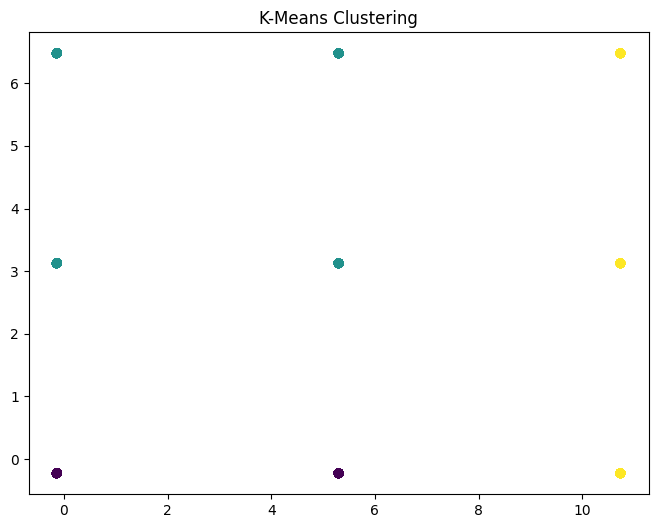

TypeError: agg function failed [how->mean,dtype->object]

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'db3' is your DataFrame and it contains 'HasSold' and 'HasBought' columns
# Preprocessing might be necessary depending on your data

# Preprocess the data
X = db3[['HasSold', 'HasBought']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters you want to find
n_clusters = 3

# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
db3['Cluster'] = kmeans_labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Now, you can analyze or predict based on the clusters
# For example, to get the mean of 'HasSold' and 'HasBought' for each cluster:
cluster_means = db3.groupby('Cluster')[['HasSold', 'HasBought']].mean()
print(cluster_means)
